In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import pandas as pd
pd.options.display.max_rows = 20
import matplotlib.pyplot as plt
import numpy as np

# Modify the dataset slightly
pt118 = pd.read_excel('/content/drive/My Drive/EEC 193/EEC 193B/Burn_Glucose_Data.xlsx', '118', skiprows = 1) 
pt185 = pd.read_excel('/content/drive/My Drive/EEC 193/EEC 193B/Burn_Glucose_Data.xlsx', '185', skiprows = 1)
pt199 = pd.read_excel('/content/drive/My Drive/EEC 193/EEC 193B/Burn_Glucose_Data.xlsx', '199', skiprows = 1)
pt205 = pd.read_excel('/content/drive/My Drive/EEC 193/EEC 193B/Burn_Glucose_Data.xlsx', '205', skiprows = 1)
pt232 = pd.read_excel('/content/drive/My Drive/EEC 193/EEC 193B/Burn_Glucose_Data.xlsx', '232', skiprows = 1)
pt240 = pd.read_excel('/content/drive/My Drive/EEC 193/EEC 193B/Burn_Glucose_Data.xlsx', '240', skiprows = 1)

# BG_data = pd.read_excel('/content/drive/My Drive/EEC 193/EEC 193B/Burn_Glucose.xlsx')

In [0]:
def drop_NaN(dataFrame):
    dataFrame = dataFrame.replace('None', np.NaN)
    dataFrame = dataFrame.dropna()
    dataFrame = dataFrame.reset_index(drop = True)
    return dataFrame

pt118 = drop_NaN(pt118)
pt185 = drop_NaN(pt185)
pt199 = drop_NaN(pt199)
pt205 = drop_NaN(pt205)
pt232 = drop_NaN(pt232)
pt240 = drop_NaN(pt240)

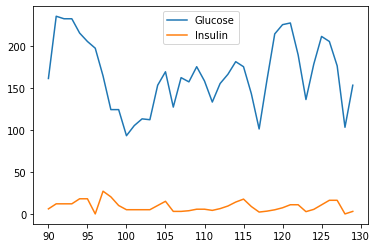

In [7]:
# plt.plot(pt118["Time"][90:130], pt205.POC_Glucose[90:130])
# plt.plot(pt118.POC_Glucose[0:1500], pt118.Insulin_Rate[0:1500], 'o')
plt.plot(pt118.POC_Glucose[90:130], label='Glucose')
plt.plot(pt118.Insulin_Rate[90:130], label='Insulin')
plt.legend()
plt.show()

In [8]:
pt118

,Time,POC_Glucose,Insulin_Rate
0,0,507,7.0
1,1,497,10.0
2,2,471,15.0
3,3,434,15.0
4,4,384,15.0
...,...,...,...
1943,2043,145,7.3
1944,2044,108,1.8
1945,2045,120,2.3
1946,2046,155,4.6


In [0]:
len_data, num_cols = pt118.shape
train_set = pt118[0 : round(0.7 * len_data)]
test_set = pt118[round(0.7 * len_data) + 1 ::]

In [6]:
from sklearn.linear_model import LinearRegression
x = train_set.POC_Glucose.values.reshape(-1, 1)
y = train_set.Insulin_Rate
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.265216070732032
